In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn  # Install the scikit-learn library
from sklearn.cluster import KMeans  # Correct import statement
from sklearn.preprocessing import StandardScaler

#EDA


In [29]:
#Read data
path = "/content/drive/MyDrive/dataset/Mall_Customers.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Check dimensions
print("Dataset shape:", dataset.shape)

Dataset shape: (200, 5)


In [8]:
# Display first few rows
print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Check data types
print(dataset.dtypes)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [10]:
# Summary statistics
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
# Check for missing values
print(dataset.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


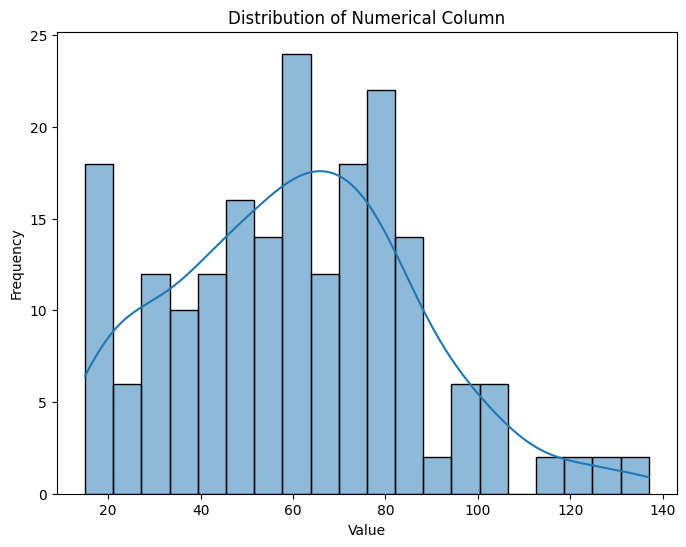

In [12]:
# Example: Histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
dataset.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

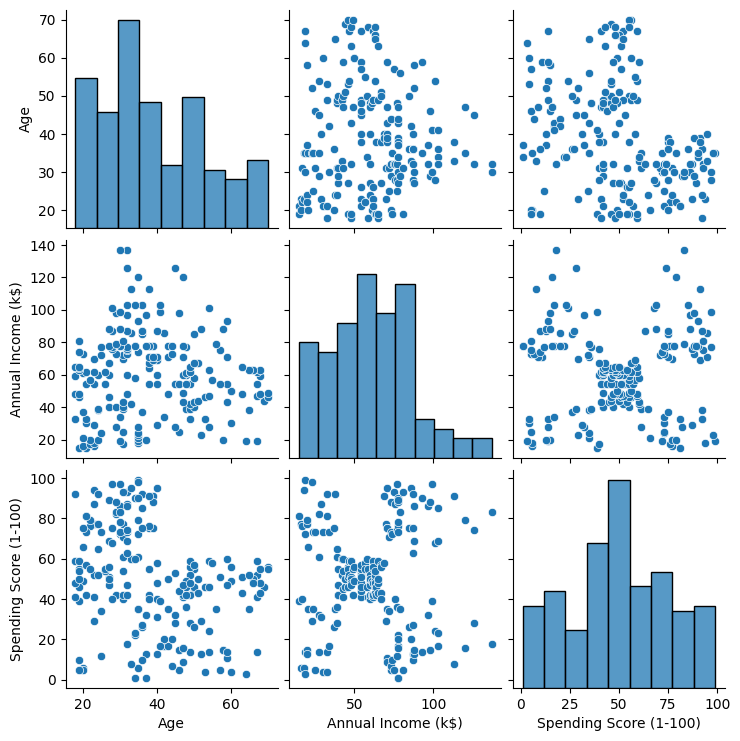

In [14]:
#  Pair plot to visualize relationships between numerical variables
# dataset=dataset.drop('CustomerID',axis=1)
# sns.pairplot(dataset,hue='Genre')
sns.pairplot(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [15]:
#Correlation matrix
correlation_matrix = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)



                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


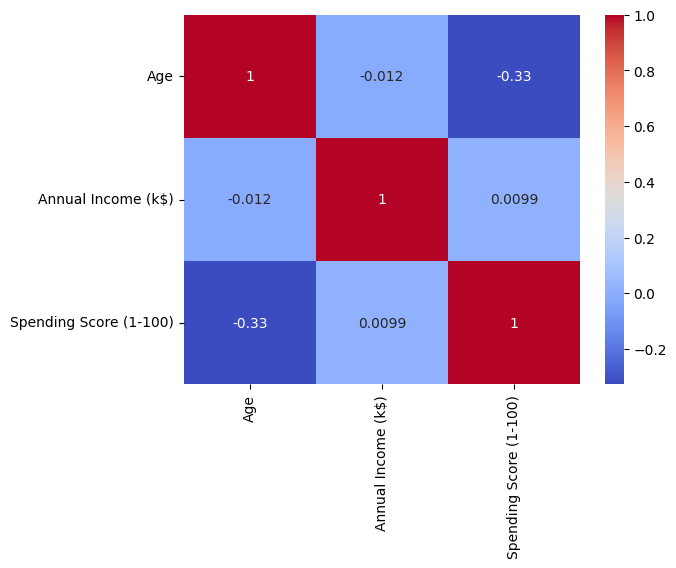

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

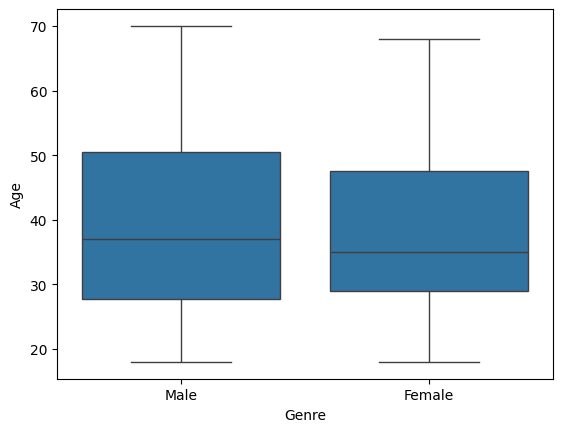

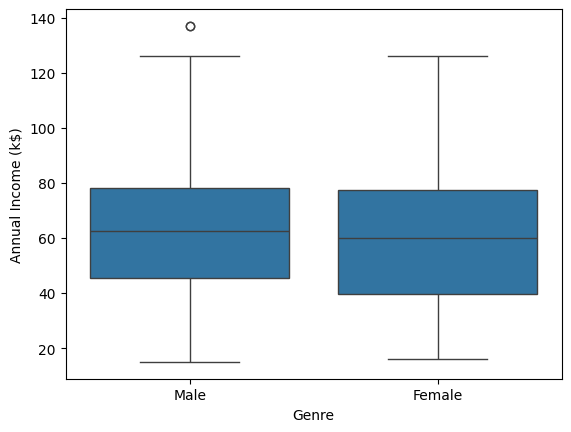

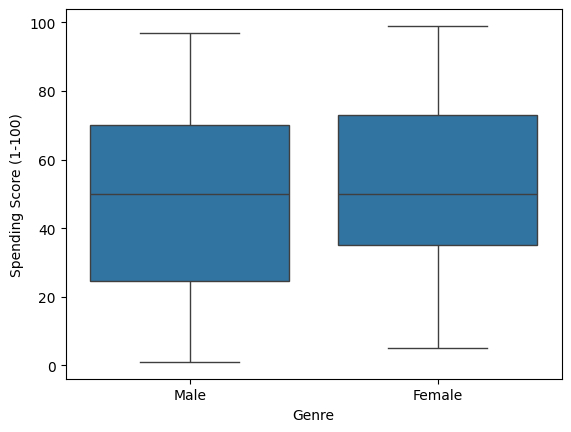

In [17]:
#  Box plot of a categorical variable
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  # plt.figure()
  sns.boxplot(data=dataset,x='Genre', y= dataset[i])
  plt.show()

#Kmeans Clustering

In [20]:
# Select features for clustering
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [21]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
#KMeans Clustering
# Determine the optimal number of clusters using the elbow method
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(dataset[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2862.2504273504273,
 2222.930303030304,
 1734.1677489177496]

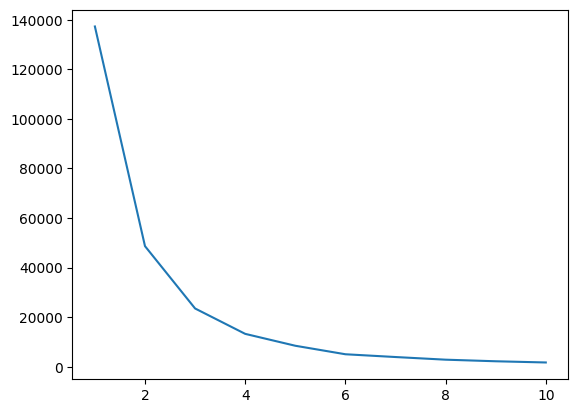

In [24]:
plt.plot(range(1,11),inertia_scores)

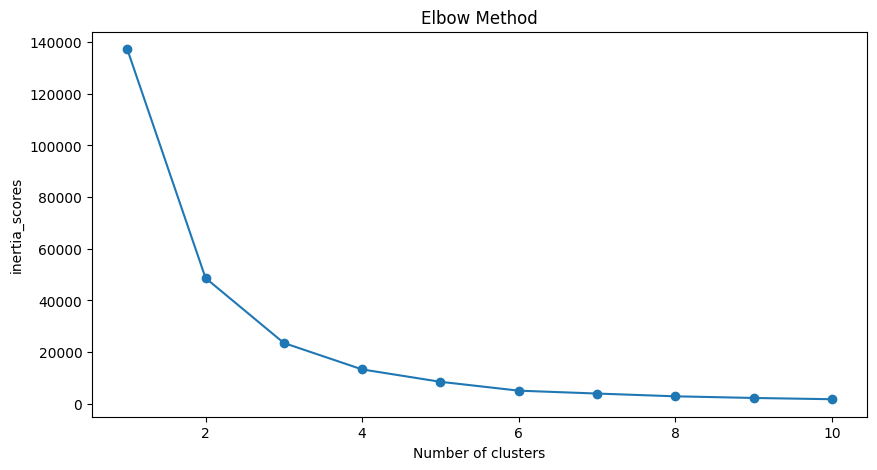

In [25]:
# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_scores')
plt.show()

In [26]:
# Choose the optimal number of clusters (for example, 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
# Export the dataset with cluster labels to a CSV file
dataset.to_csv('customer_segmentation.csv', index=False)
